In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys
from matplotlib import animation, rc
from IPython.display import HTML, Image

src_dir = os.path.abspath("/home/mmfarrugia/repos/optimization/hybrid_optimizer")
sys.path.append(src_dir)

from hybrid_optimizer import PSO_GA
from plotters import plot_cost_history, plot_contour, plot_surface, plot_summary, Mesher, Designer
import example_funcs

technical_replicates = 10

Himmelblau's  objective function

    Only takes two dimensions and has four equal global minimums
     of zero at :code:`f([3.0,2.0])`, :code:`f([-2.805118,3.131312])`,
     :code:`f([-3.779310,-3.283186])`, and :code:`f([3.584428,-1.848126])`.
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[0,1000]`

Matyas  objective function

    Only takes two dimensions and has a global minimum at
    :code:`f([0,0])`. Its coordinates are bounded within
    :code:`[-10,10]`.

In [2]:
import copy
n_dim = 2
lb=[-10., -10.]
ub = [10., 10.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (0, 0, 0)

random_config = {
    'name': 'Random',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = {
    'name': 'Best',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/best/1'
}

taper_config = {
    'name': 'Taper',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

skew_config = {
    'name': 'Skew',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

taper_skew_config = {
    'name': 'Taper & Skew',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "skew_social": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

configs = [random_config, best_config, skew_config, taper_config, taper_skew_config]

In [3]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.matyas, limits=[(-10,10), (-10,10)])
#Adjust figure limits
d = Designer(limits=[(-10,10), (-10,10), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

i: best_x is  [ 0.03954461 -0.04073561] best_y is [0.00161124]
i: best_x is  [0.34404566 0.29740222] best_y is [0.00465846]
i: best_x is  [0.07040929 0.07149148] best_y is [0.00020165]
i: best_x is  [-2.13077458e-06 -5.03408165e-07] best_y is [7.31469552e-13]
i: best_x is  [-1.41982752e-05 -1.29238113e-05] best_y is [7.76214028e-12]


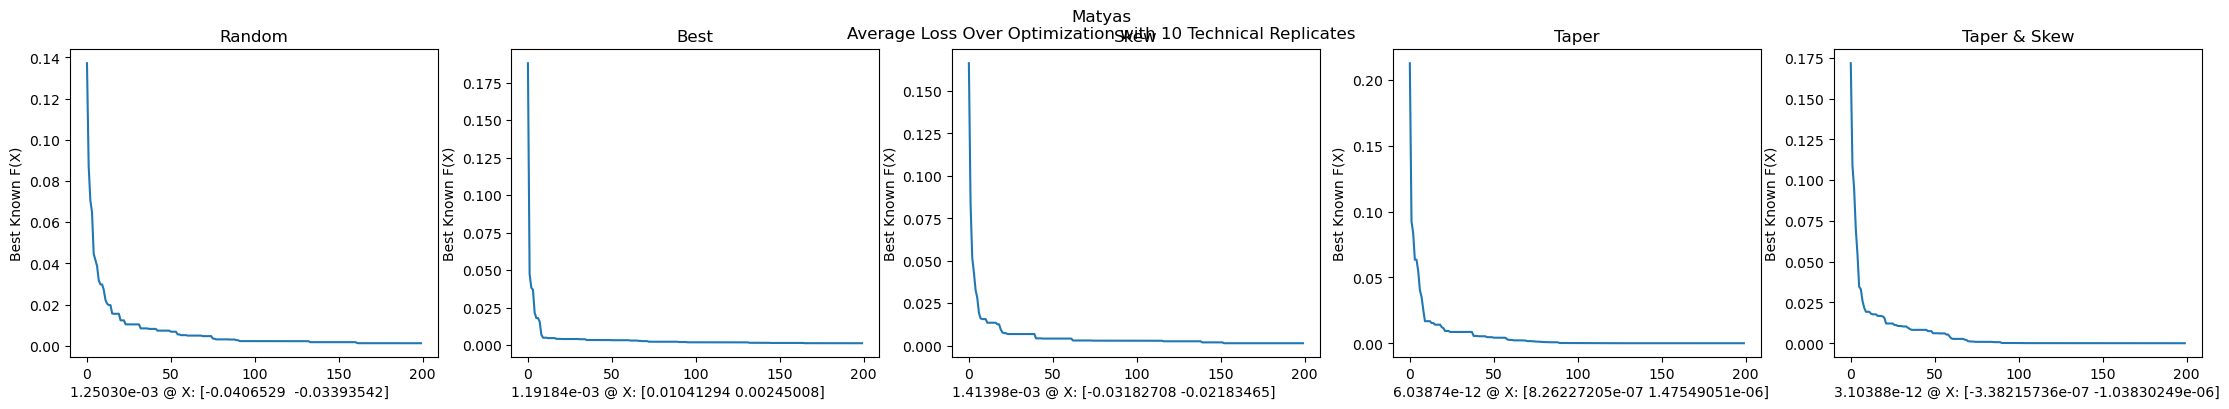

In [4]:
fig = plt.figure(figsize=(5.5*len(configs),4))
fig.suptitle('Matyas\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')
opts = {}
full_opts = {}
for i, config in enumerate(configs):
    opt_name = config['name']
    full_opts[opt_name] = []
    opt = (PSO_GA(example_funcs.matyas, n_dim=2, config=config))
    opt.record_mode = True
    opt.run()
    print('i: best_x is ', opt.gbest_x, 'best_y is', opt.gbest_y)
    opts[opt_name] = opt
    full_opts[opt_name].append(opt)
    sum_loss = np.array(opt.gbest_y_hist)
    sum_x = np.array(opt.gbest_x)
    sum_y = opt.gbest_y
    for t in range(technical_replicates-1):
        opt = (PSO_GA(example_funcs.matyas, n_dim=2, config=config))
        opt.record_mode = True
        opt.run()
        full_opts[opt_name].append(opt)
        sum_loss += opt.gbest_y_hist
        sum_x += opt.gbest_x
        sum_y += opt.gbest_y
    fig.add_subplot(1, len(configs), i+1)
    average_loss = np.divide(sum_loss, technical_replicates)
    average_x = np.divide(sum_x, technical_replicates)
    average_y = sum_y / technical_replicates
    #average_x = ["{:.5e}".format(x) for x in average_x]
    results_text =  "{:.5e}".format(average_y[0]) + ' @ X: ' + str(average_x)
    plt.plot(average_loss)
    #plt.xlabel('Iteration')
    plt.ylabel('Best Known F(X)')
    plt.annotate(results_text, (0,0), (0,-20), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.title(opt_name)

plt.show()

400
400
400
261
261


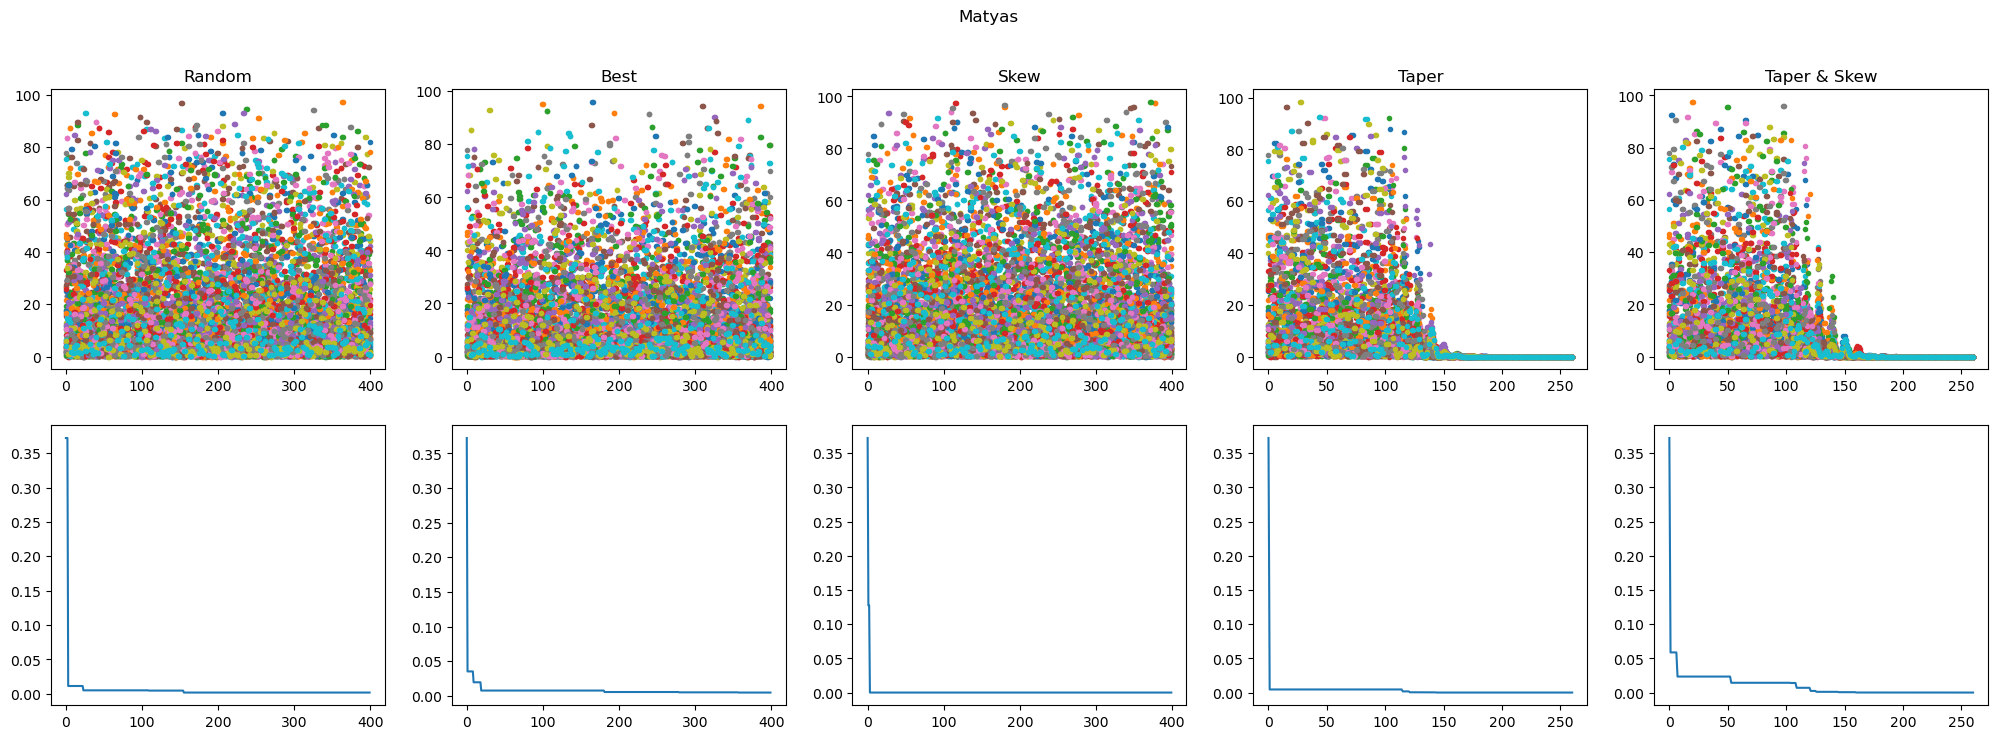

In [5]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8))
fig.suptitle('Matyas')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [6]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('matyas_'+str(i)+'.gif', writer='ffmpeg', fps=20)

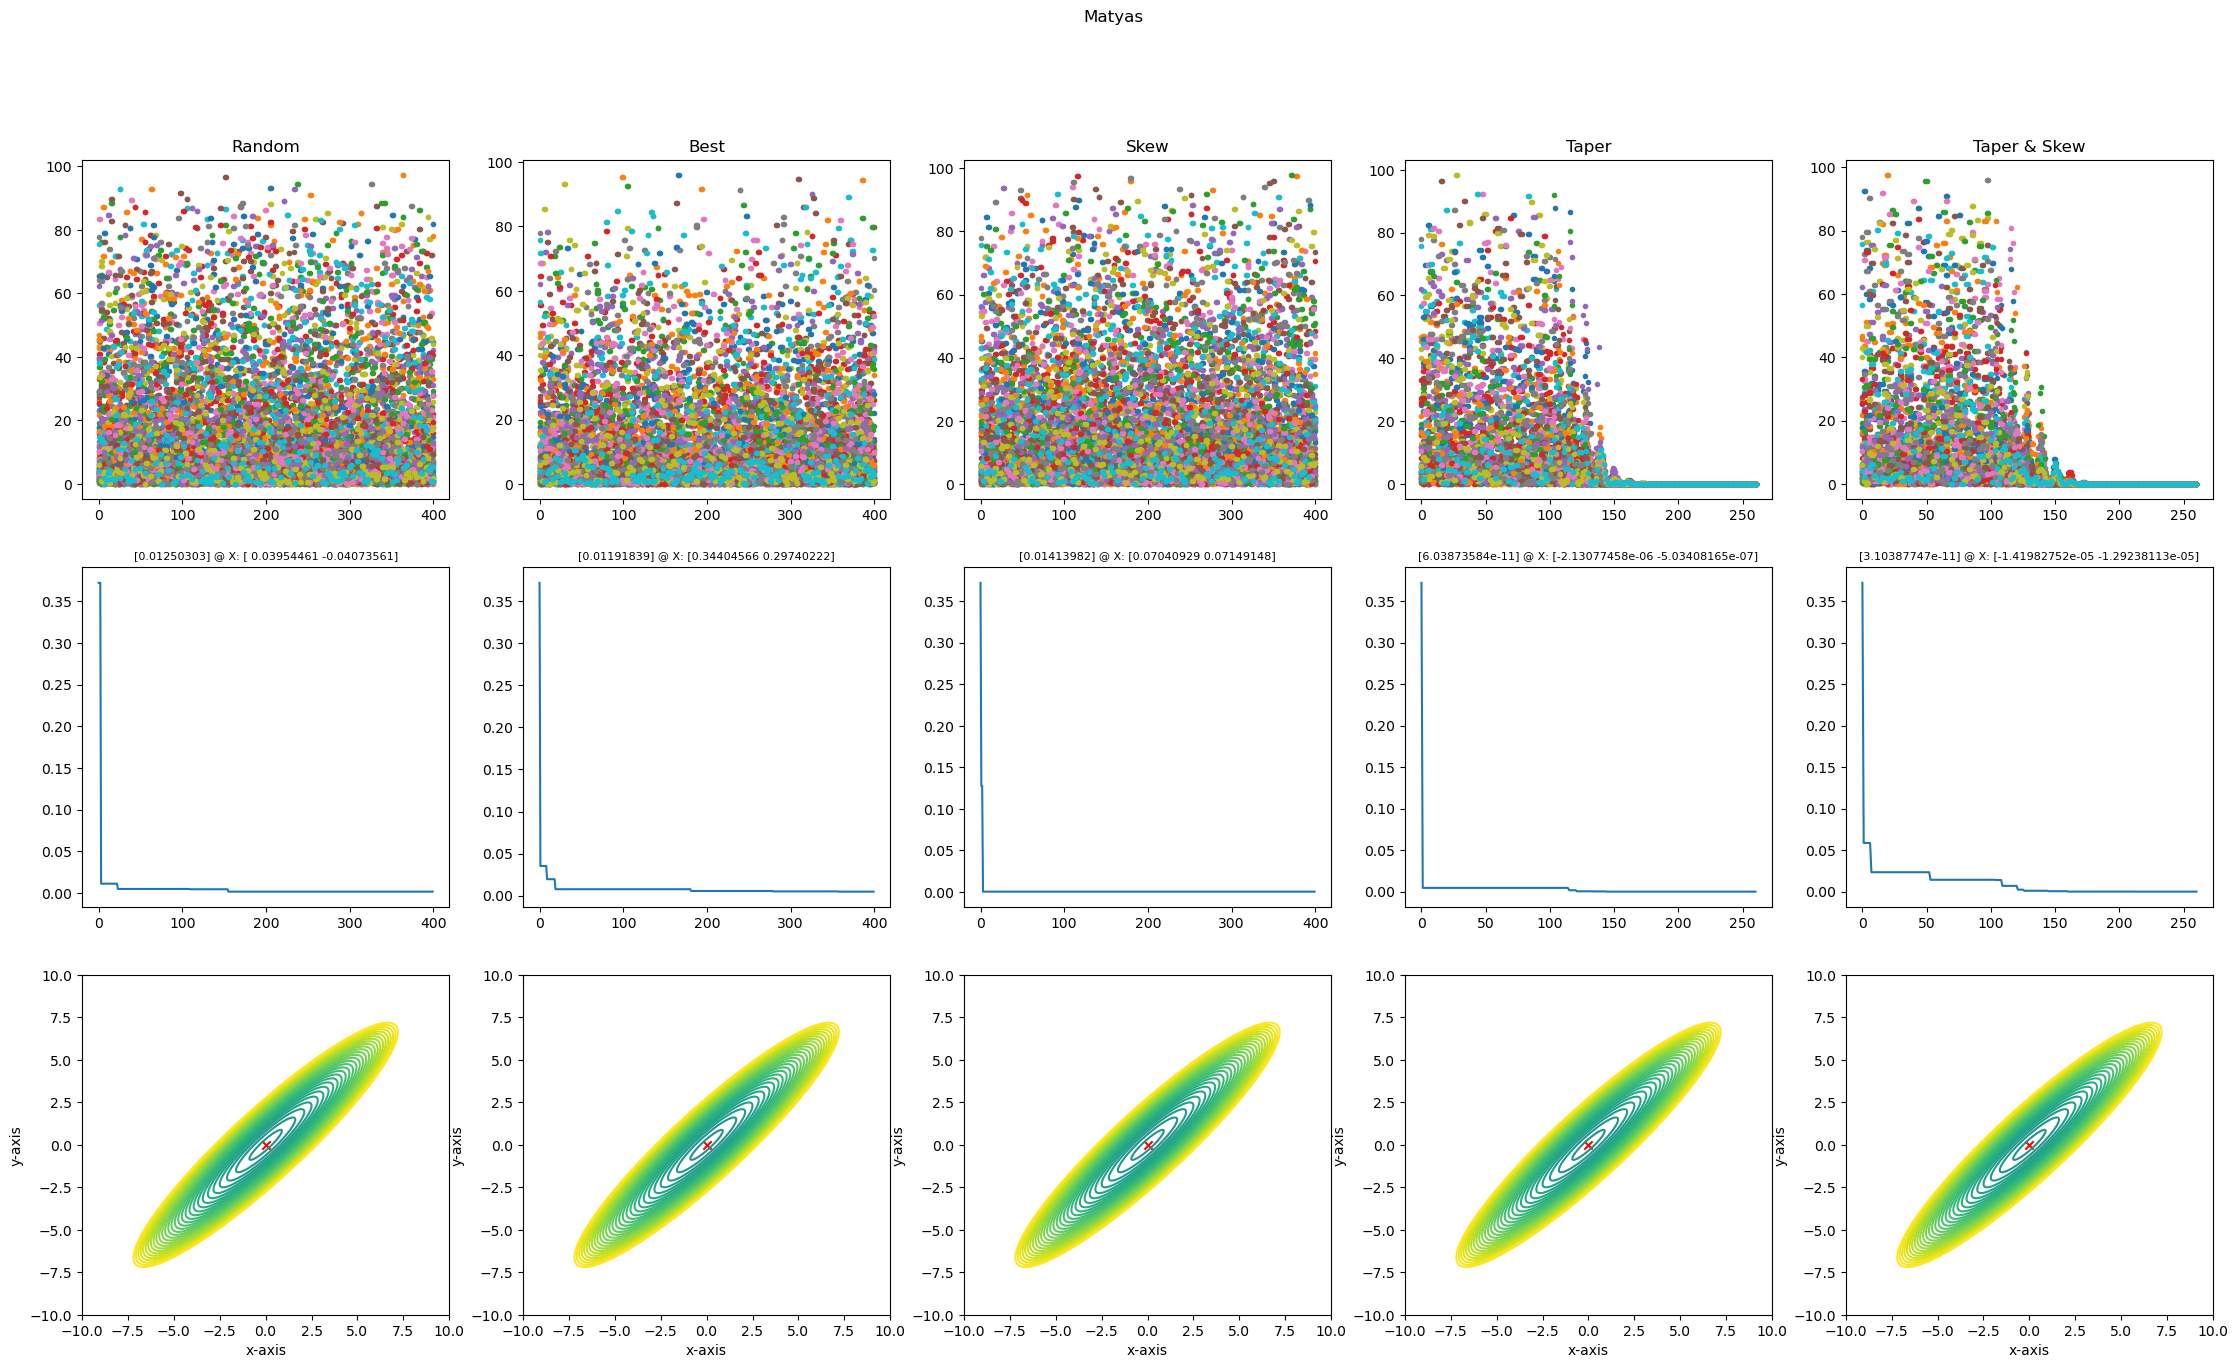

In [7]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Matyas", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [8]:
ani_summary.save('matyas_summary.gif', writer='ffmpeg', fps=15)
Image(url='matyas_summary.gif')

In [9]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Matyas", mark=global_opt)
    animation3d.save('matyas_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

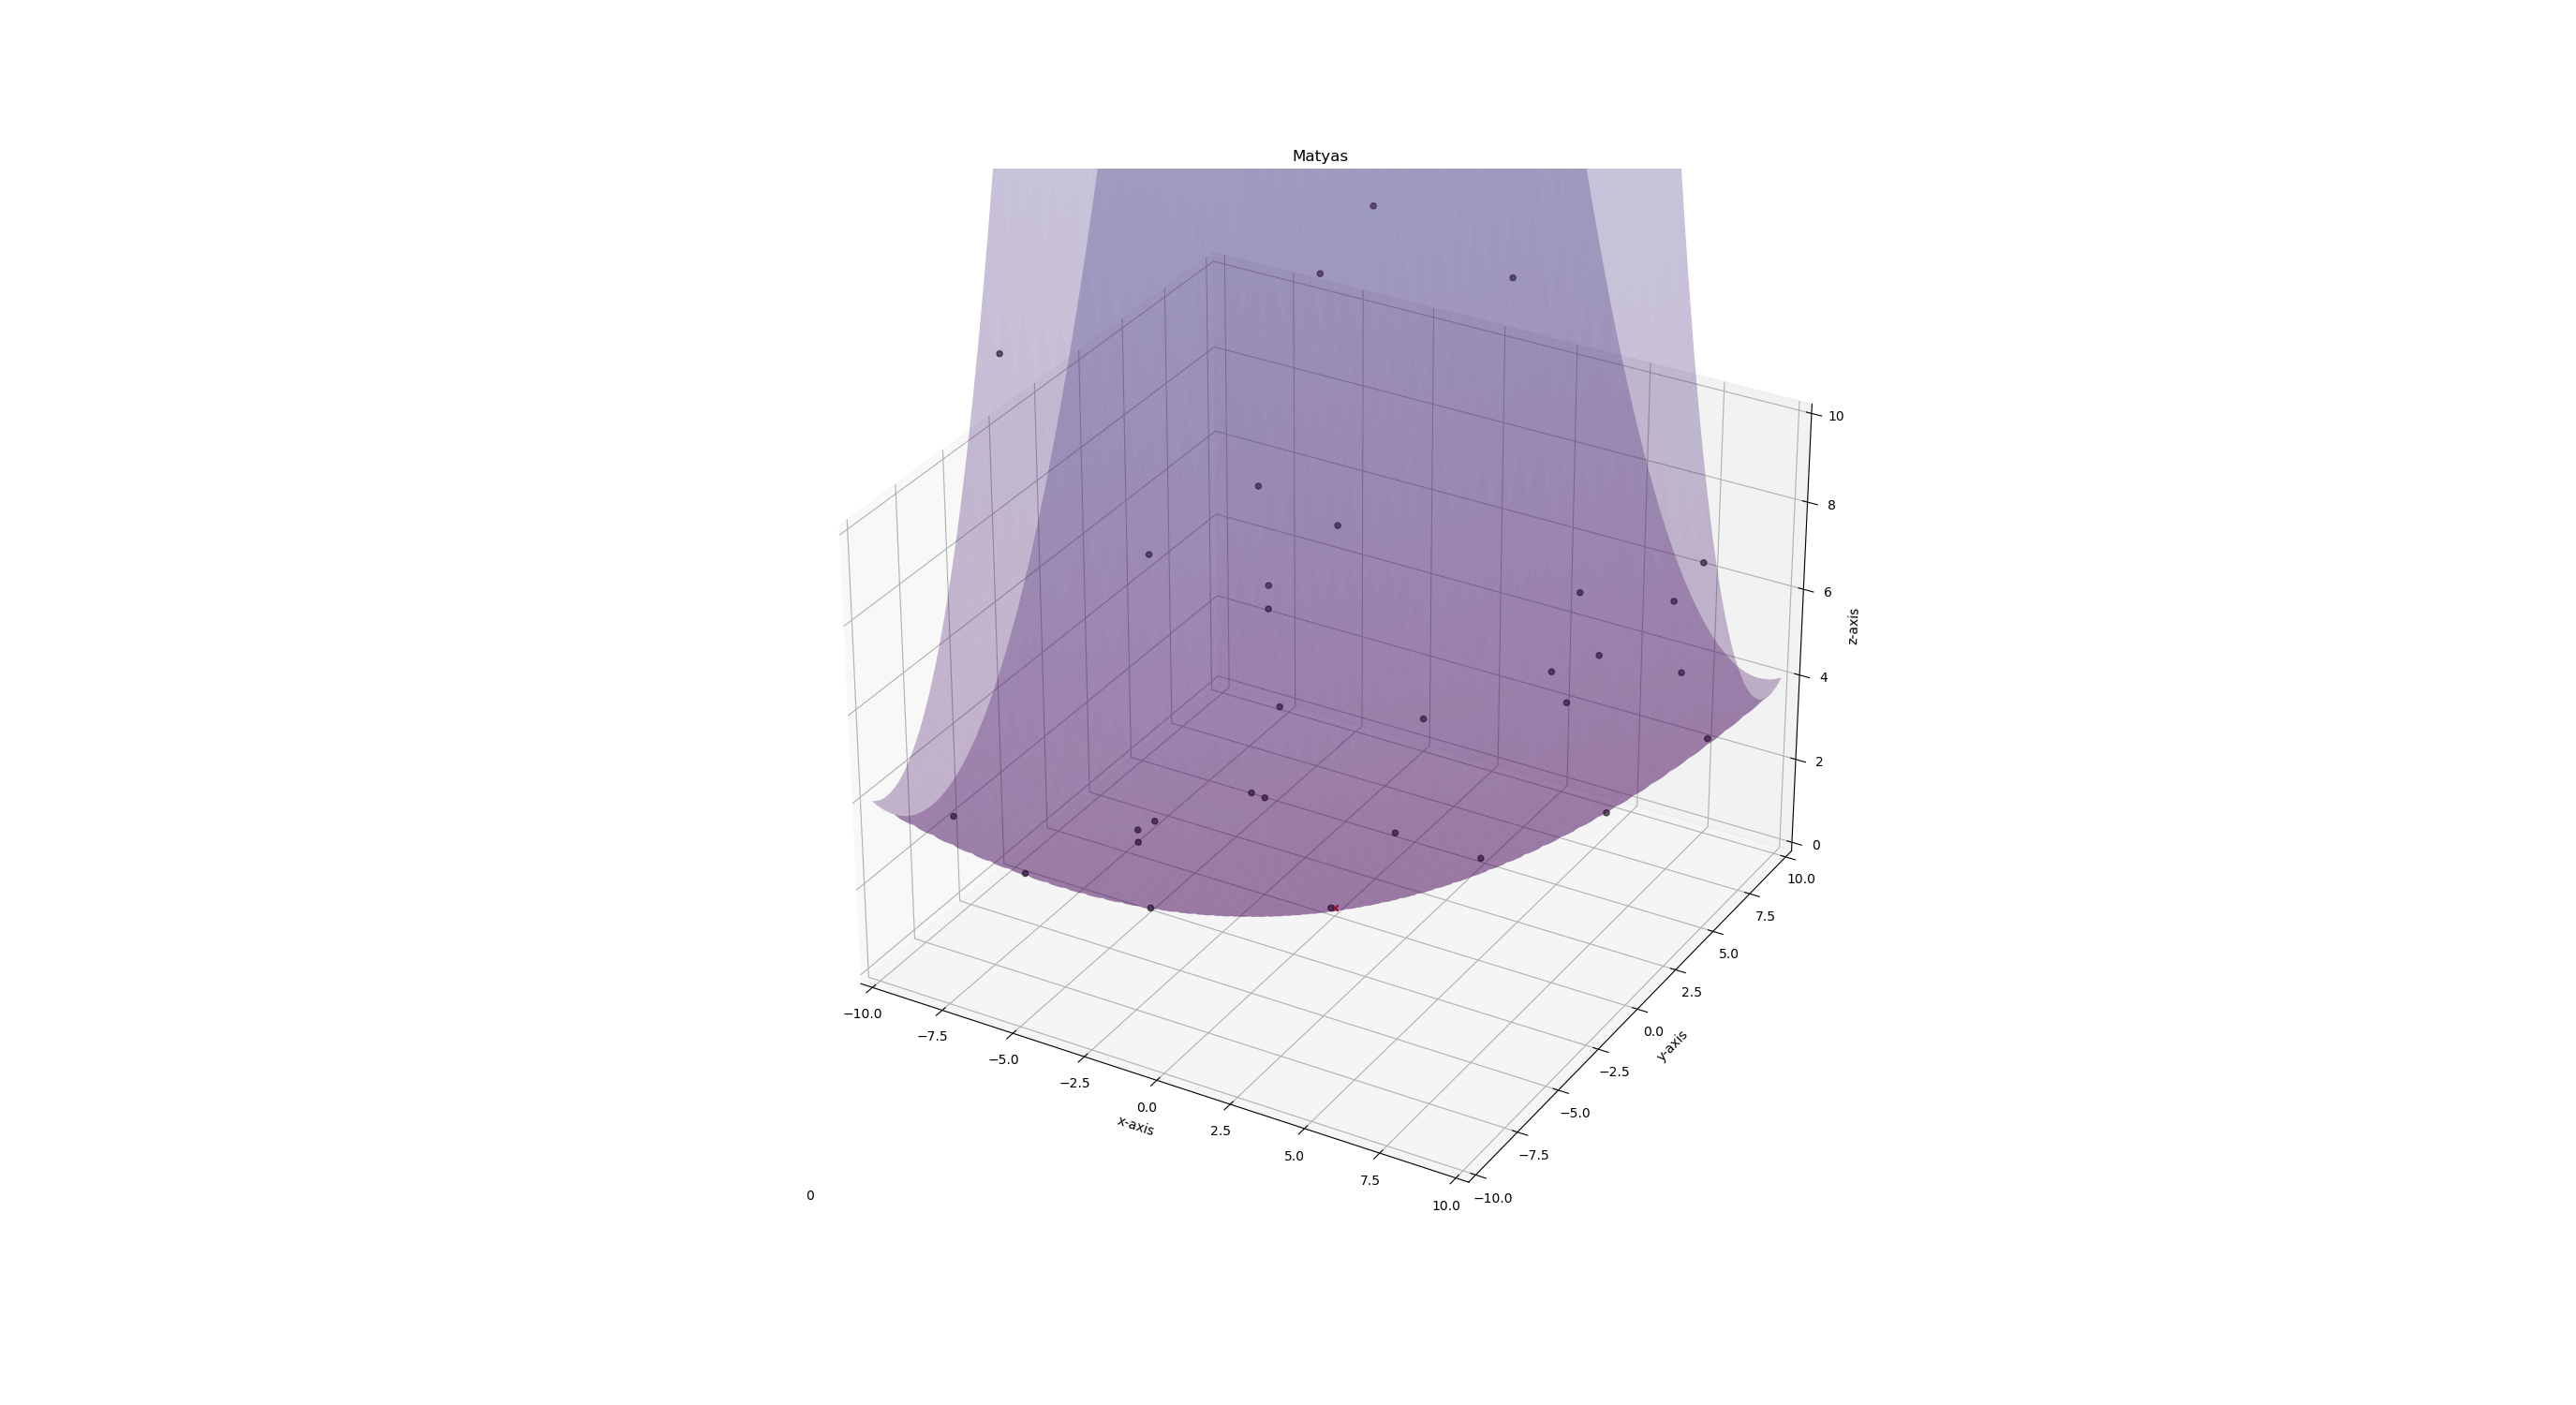

In [10]:
Image('matyas_Random_3d.gif')

In [11]:
%%capture
d.limits = [(-5,5), (-5,5), (-0.1, 100.0)]
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Matyas", mark=global_opt)
    animation3d.save('matyas_zoom_'+i+'_3d.gif', writer='ffmpeg', fps=15)

Three-Hump Camel  objective function

    Only takes two dimensions and has a global minimum of `0` at
    :code:`f([0, 0])`. Its coordinates are bounded within
    :code:`[-5, 5]`.

    Best visualized in the full domin and a range of :code:`[0, 2000]`.

Easom's  objective function

    Only takes two dimensions and has a global minimum of
    `-1` at :code:`f([pi, pi])`.
    Its coordinates are bounded within :code:`[-100,100]`.

    Best visualized in the domain of :code:`[-5, 5]` and a range of :code:`[-1, 0.2]`.

Sphere  objective function

    Has a global minimum at :code:`0` and with a search domain of
        :code:`[-inf, inf]`

In [12]:
n_dim = 2
lb = [-5., -5.]
ub = [5., 5.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

global_opt = (0, 0, 0)

random_config = {
    'name': 'Random',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": True,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = {
    'name': 'Best',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": True,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/best/1'
}

taper_config = {
    'name': 'Taper',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": True,
    "taper_GA": True,
    "taper_mutation": True,
    "skew_social": False,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

skew_config = {
    'name': 'Skew',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": True,
    "taper_GA": False,
    "taper_mutation": False,
    "skew_social": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

taper_skew_config = {
    'name': 'Taper & Skew',
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": True,
    "taper_GA": True,
    "taper_mutation": True,
    "skew_social": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}

configs = [random_config, best_config, skew_config, taper_config, taper_skew_config]

In [13]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.ps_sphere)
#Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

i: best_x is  [ 0.01874853 -0.00240253] best_y is [0.00035728]
i: best_x is  [0.03761877 0.00898853] best_y is [0.00149597]
i: best_x is  [ 0.01268614 -0.0004588 ] best_y is [0.00016115]
i: best_x is  [ 8.24943675e-07 -5.78977299e-07] best_y is [1.01574678e-12]
i: best_x is  [-9.66459567e-08  5.60708221e-07] best_y is [3.2373415e-13]


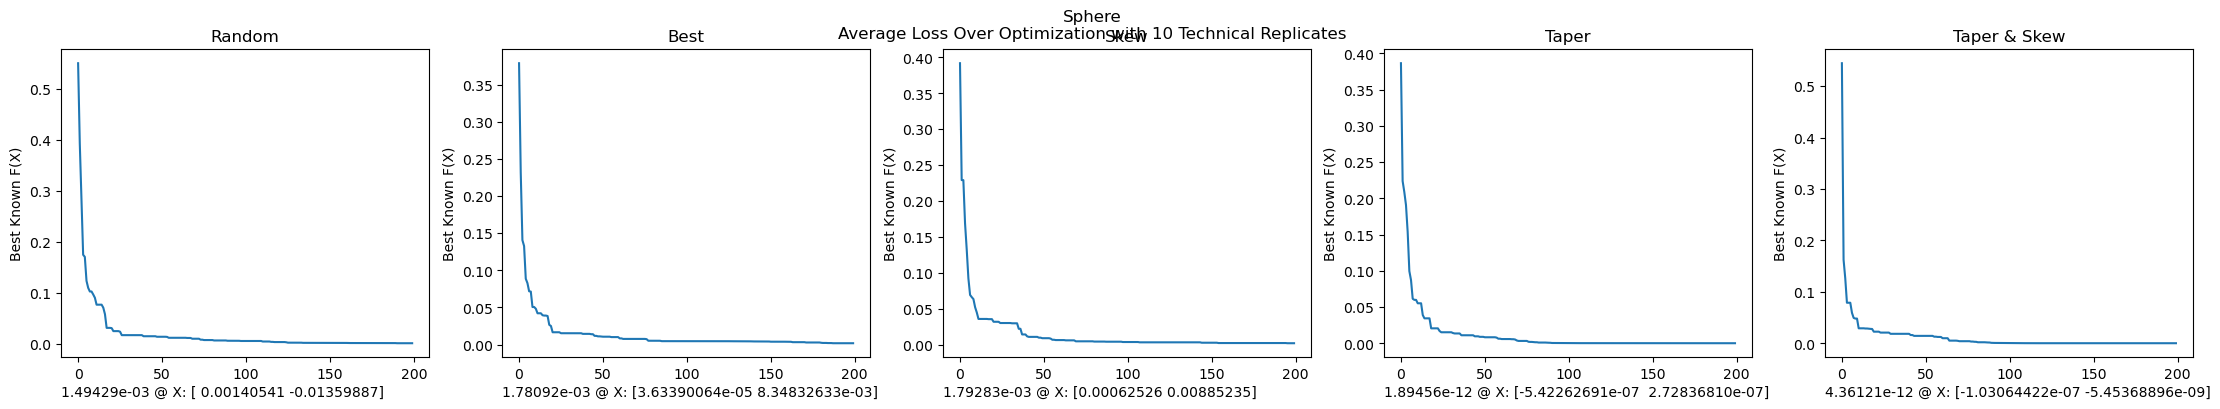

In [14]:
fig = plt.figure(figsize=(5.5*len(configs),4))
fig.suptitle('Sphere\nAverage Loss Over Optimization with '+ str(technical_replicates) + ' Technical Replicates')
opts = {}
full_opts = {}
for i, config in enumerate(configs):
    opt_name = config['name']
    full_opts[opt_name] = []
    opt = (PSO_GA(example_funcs.sphere, n_dim=2, config=config))
    opt.record_mode = True
    opt.run()
    print('i: best_x is ', opt.gbest_x, 'best_y is', opt.gbest_y)
    opts[opt_name] = opt
    full_opts[opt_name].append(opt)
    sum_loss = np.array(opt.gbest_y_hist)
    sum_x = np.array(opt.gbest_x)
    sum_y = opt.gbest_y
    for t in range(technical_replicates-1):
        opt = (PSO_GA(example_funcs.sphere, n_dim=2, config=config))
        opt.record_mode = True
        opt.run()
        full_opts[opt_name].append(opt)
        sum_loss += opt.gbest_y_hist
        sum_x += opt.gbest_x
        sum_y += opt.gbest_y
    fig.add_subplot(1, len(configs), i+1)
    average_loss = np.divide(sum_loss, technical_replicates)
    average_x = np.divide(sum_x, technical_replicates)
    average_y = sum_y / technical_replicates
    #average_x = ["{:.5e}".format(x) for x in average_x]
    results_text =  "{:.5e}".format(average_y[0]) + ' @ X: ' + str(average_x)
    plt.plot(average_loss)
    #plt.xlabel('Iteration')
    plt.ylabel('Best Known F(X)')
    plt.annotate(results_text, (0,0), (0,-20), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.title(opt_name)

plt.show()

400
400
400
261
261


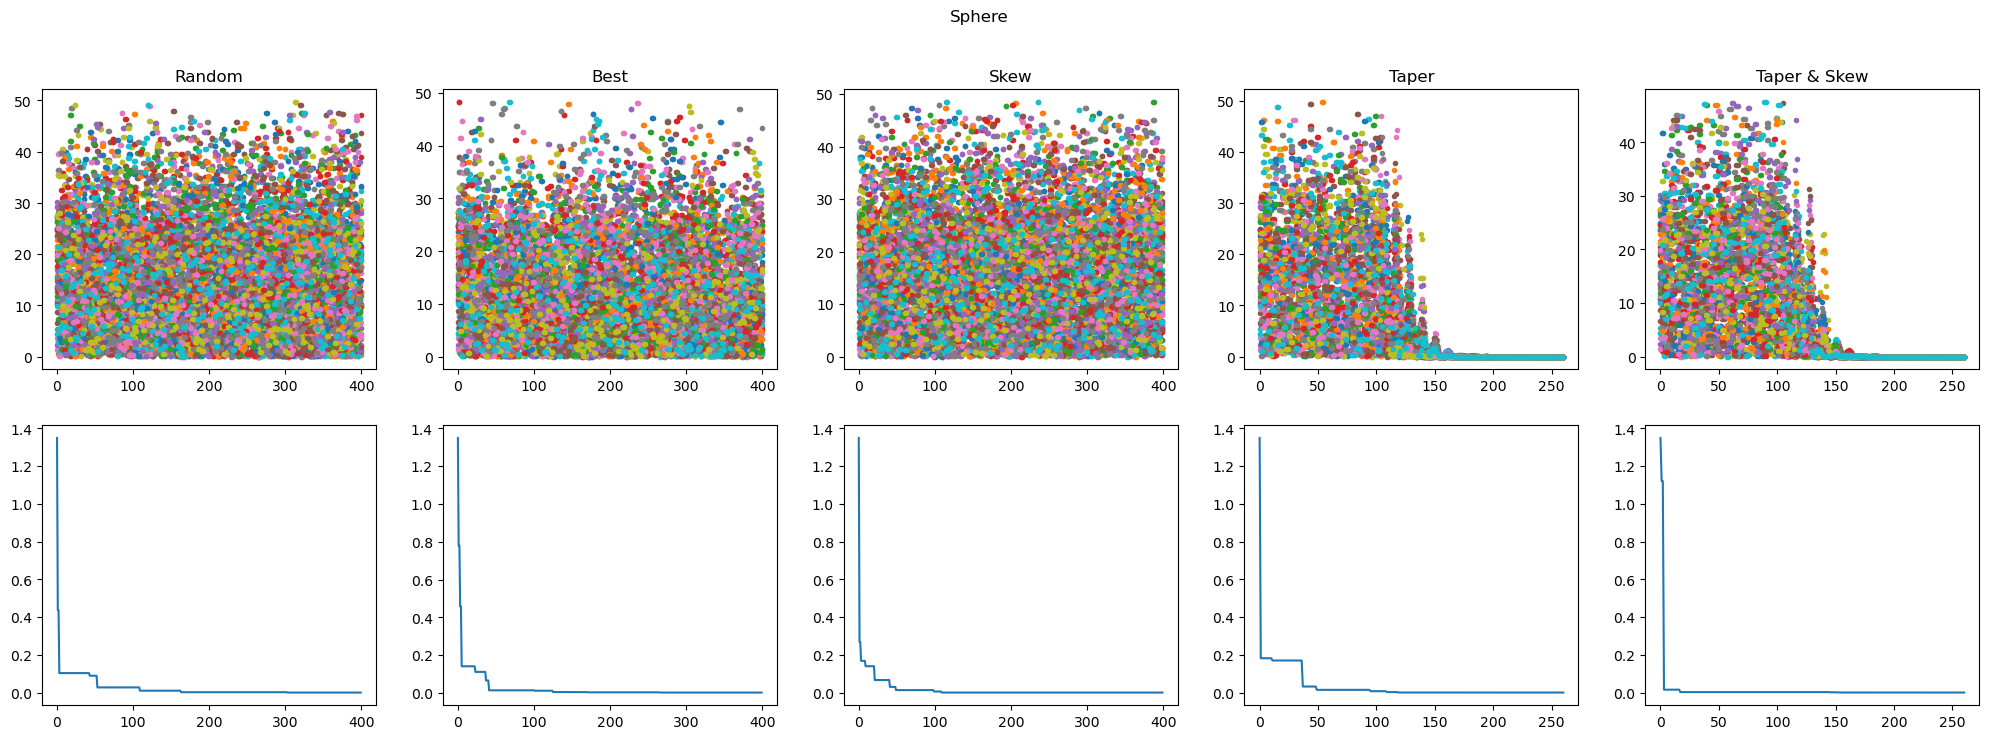

In [15]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts), figsize=(5*len(configs),8))
fig.suptitle('Sphere')
for i, key in enumerate(opts):
    opt = opts[key]
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    ax[0,i].set_title(configs[i]['name'])
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
    print(len(Y_history))
plt.show()

In [16]:
%%capture
for i, opt in opts.items():
    animation2D = plot_contour(pos_history=opts[i].record_value['X'], mesher=m, designer=d, mark=global_opt)
    animation2D.save('sphere_'+str(i)+'.gif', writer='ffmpeg', fps=20)

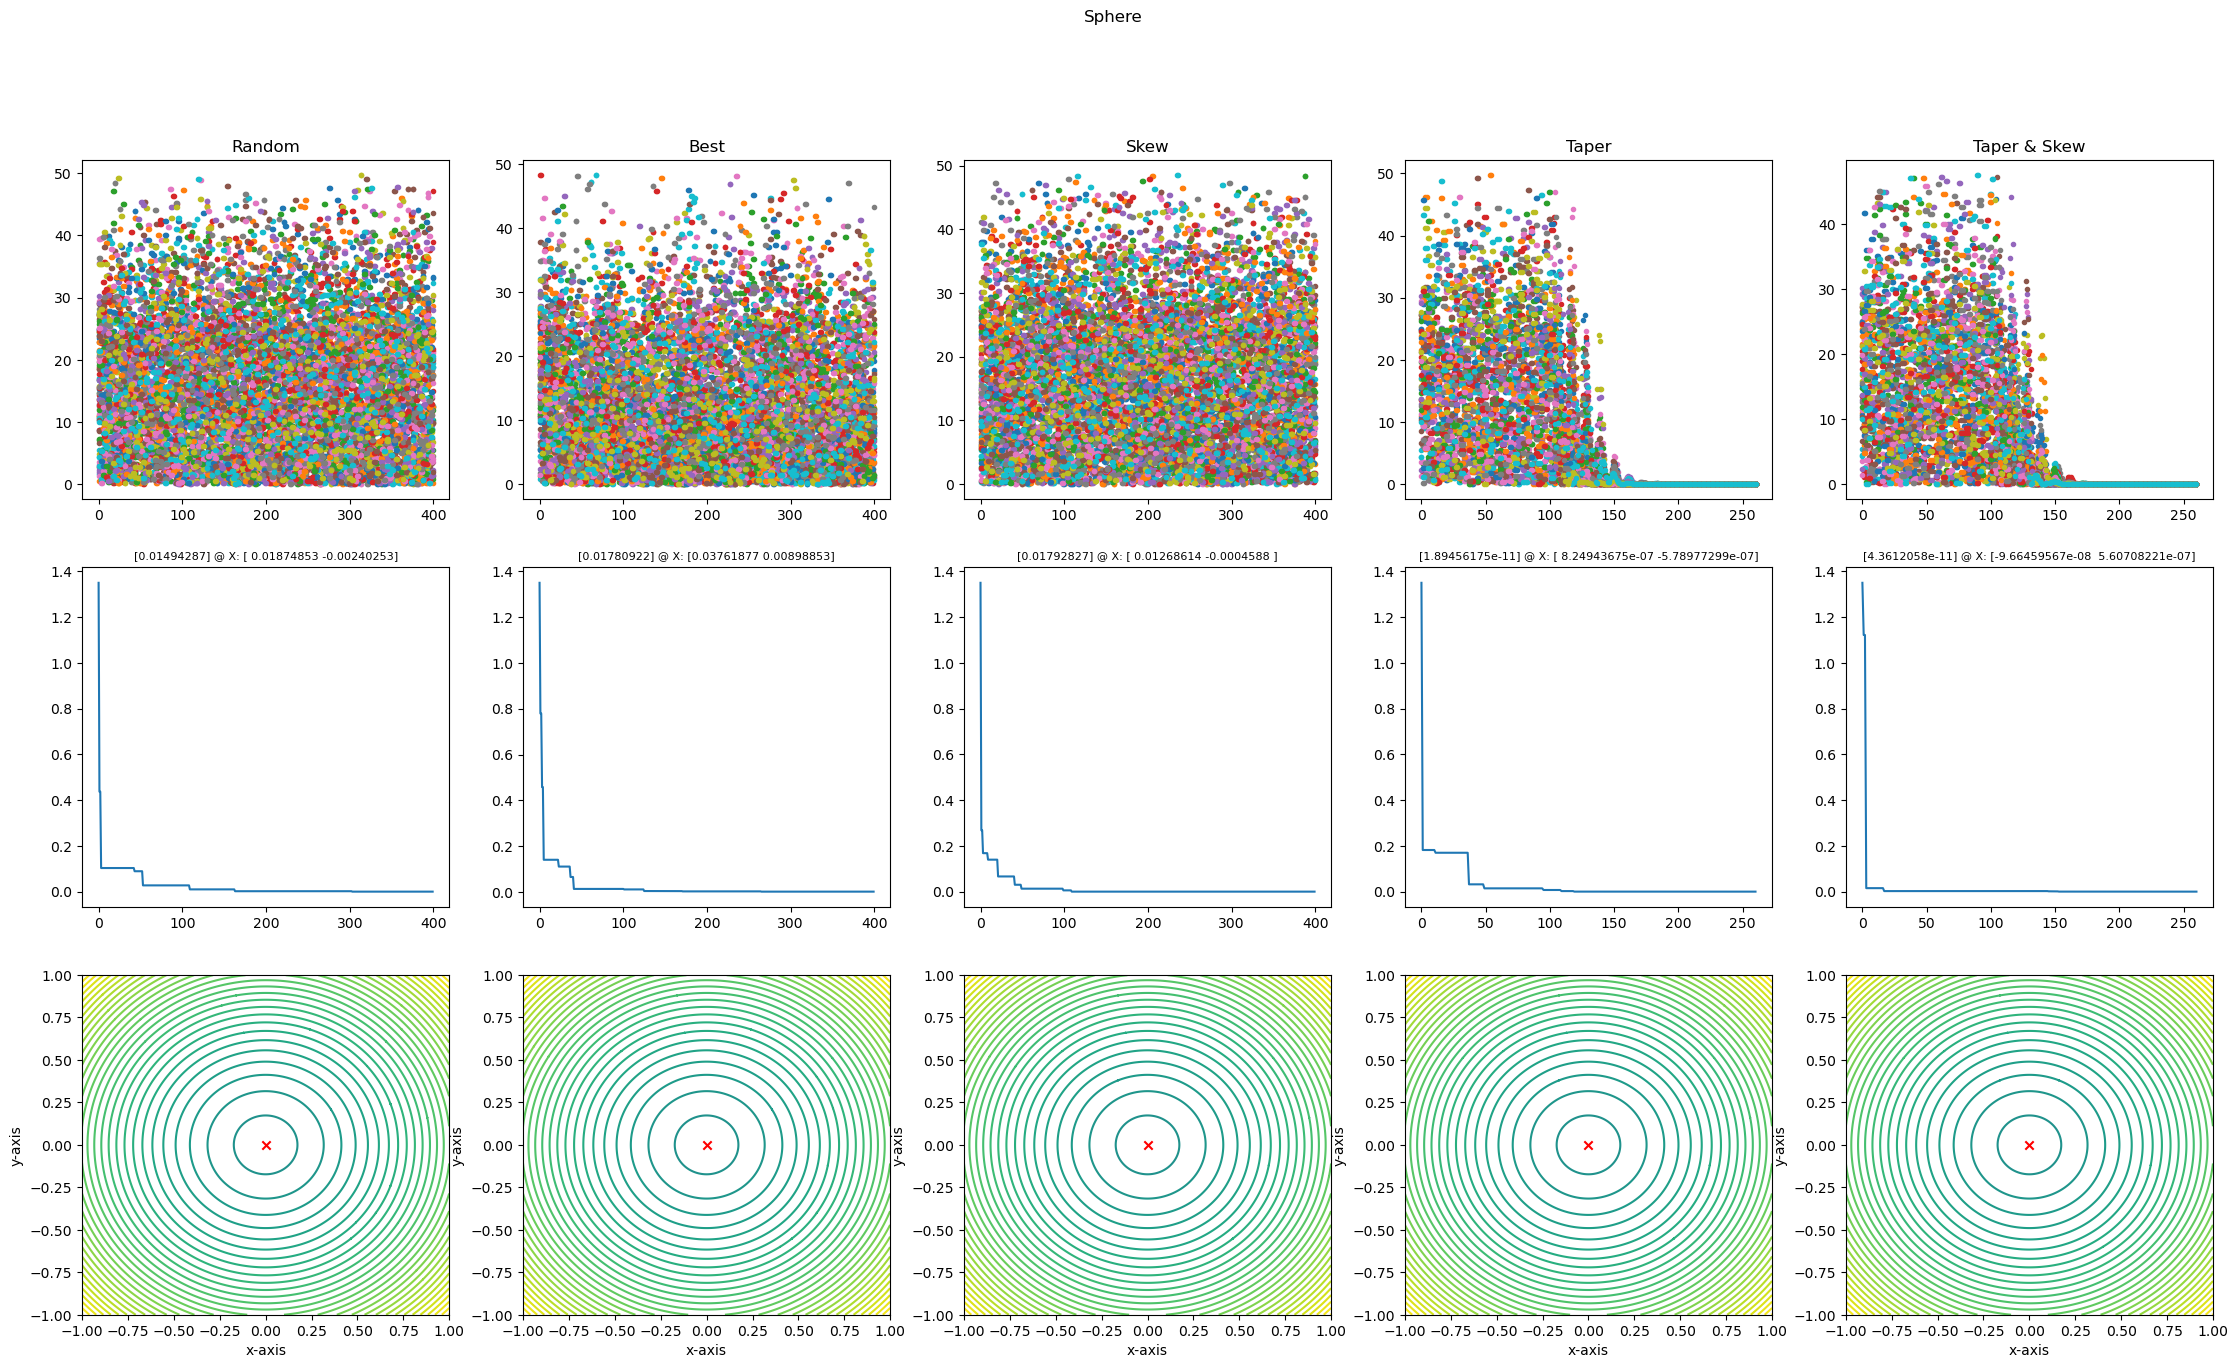

In [17]:
d.figsize= (len(configs) * 5.5, 15)
ani_summary = plot_summary(optimizers=list(opts.values()), title="Sphere", titles=[config['name'] for config in configs], mesher=m, designer=d, mark=global_opt)
plt.show()


In [18]:
ani_summary.save('sphere_summary.gif', writer='ffmpeg', fps=15)
Image(url='sphere_summary.gif')

In [19]:
%%capture
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Sphere", mark=global_opt)
    animation3d.save('sphere_'+i+'_3d.gif', writer='ffmpeg', fps=15)
    print(i)

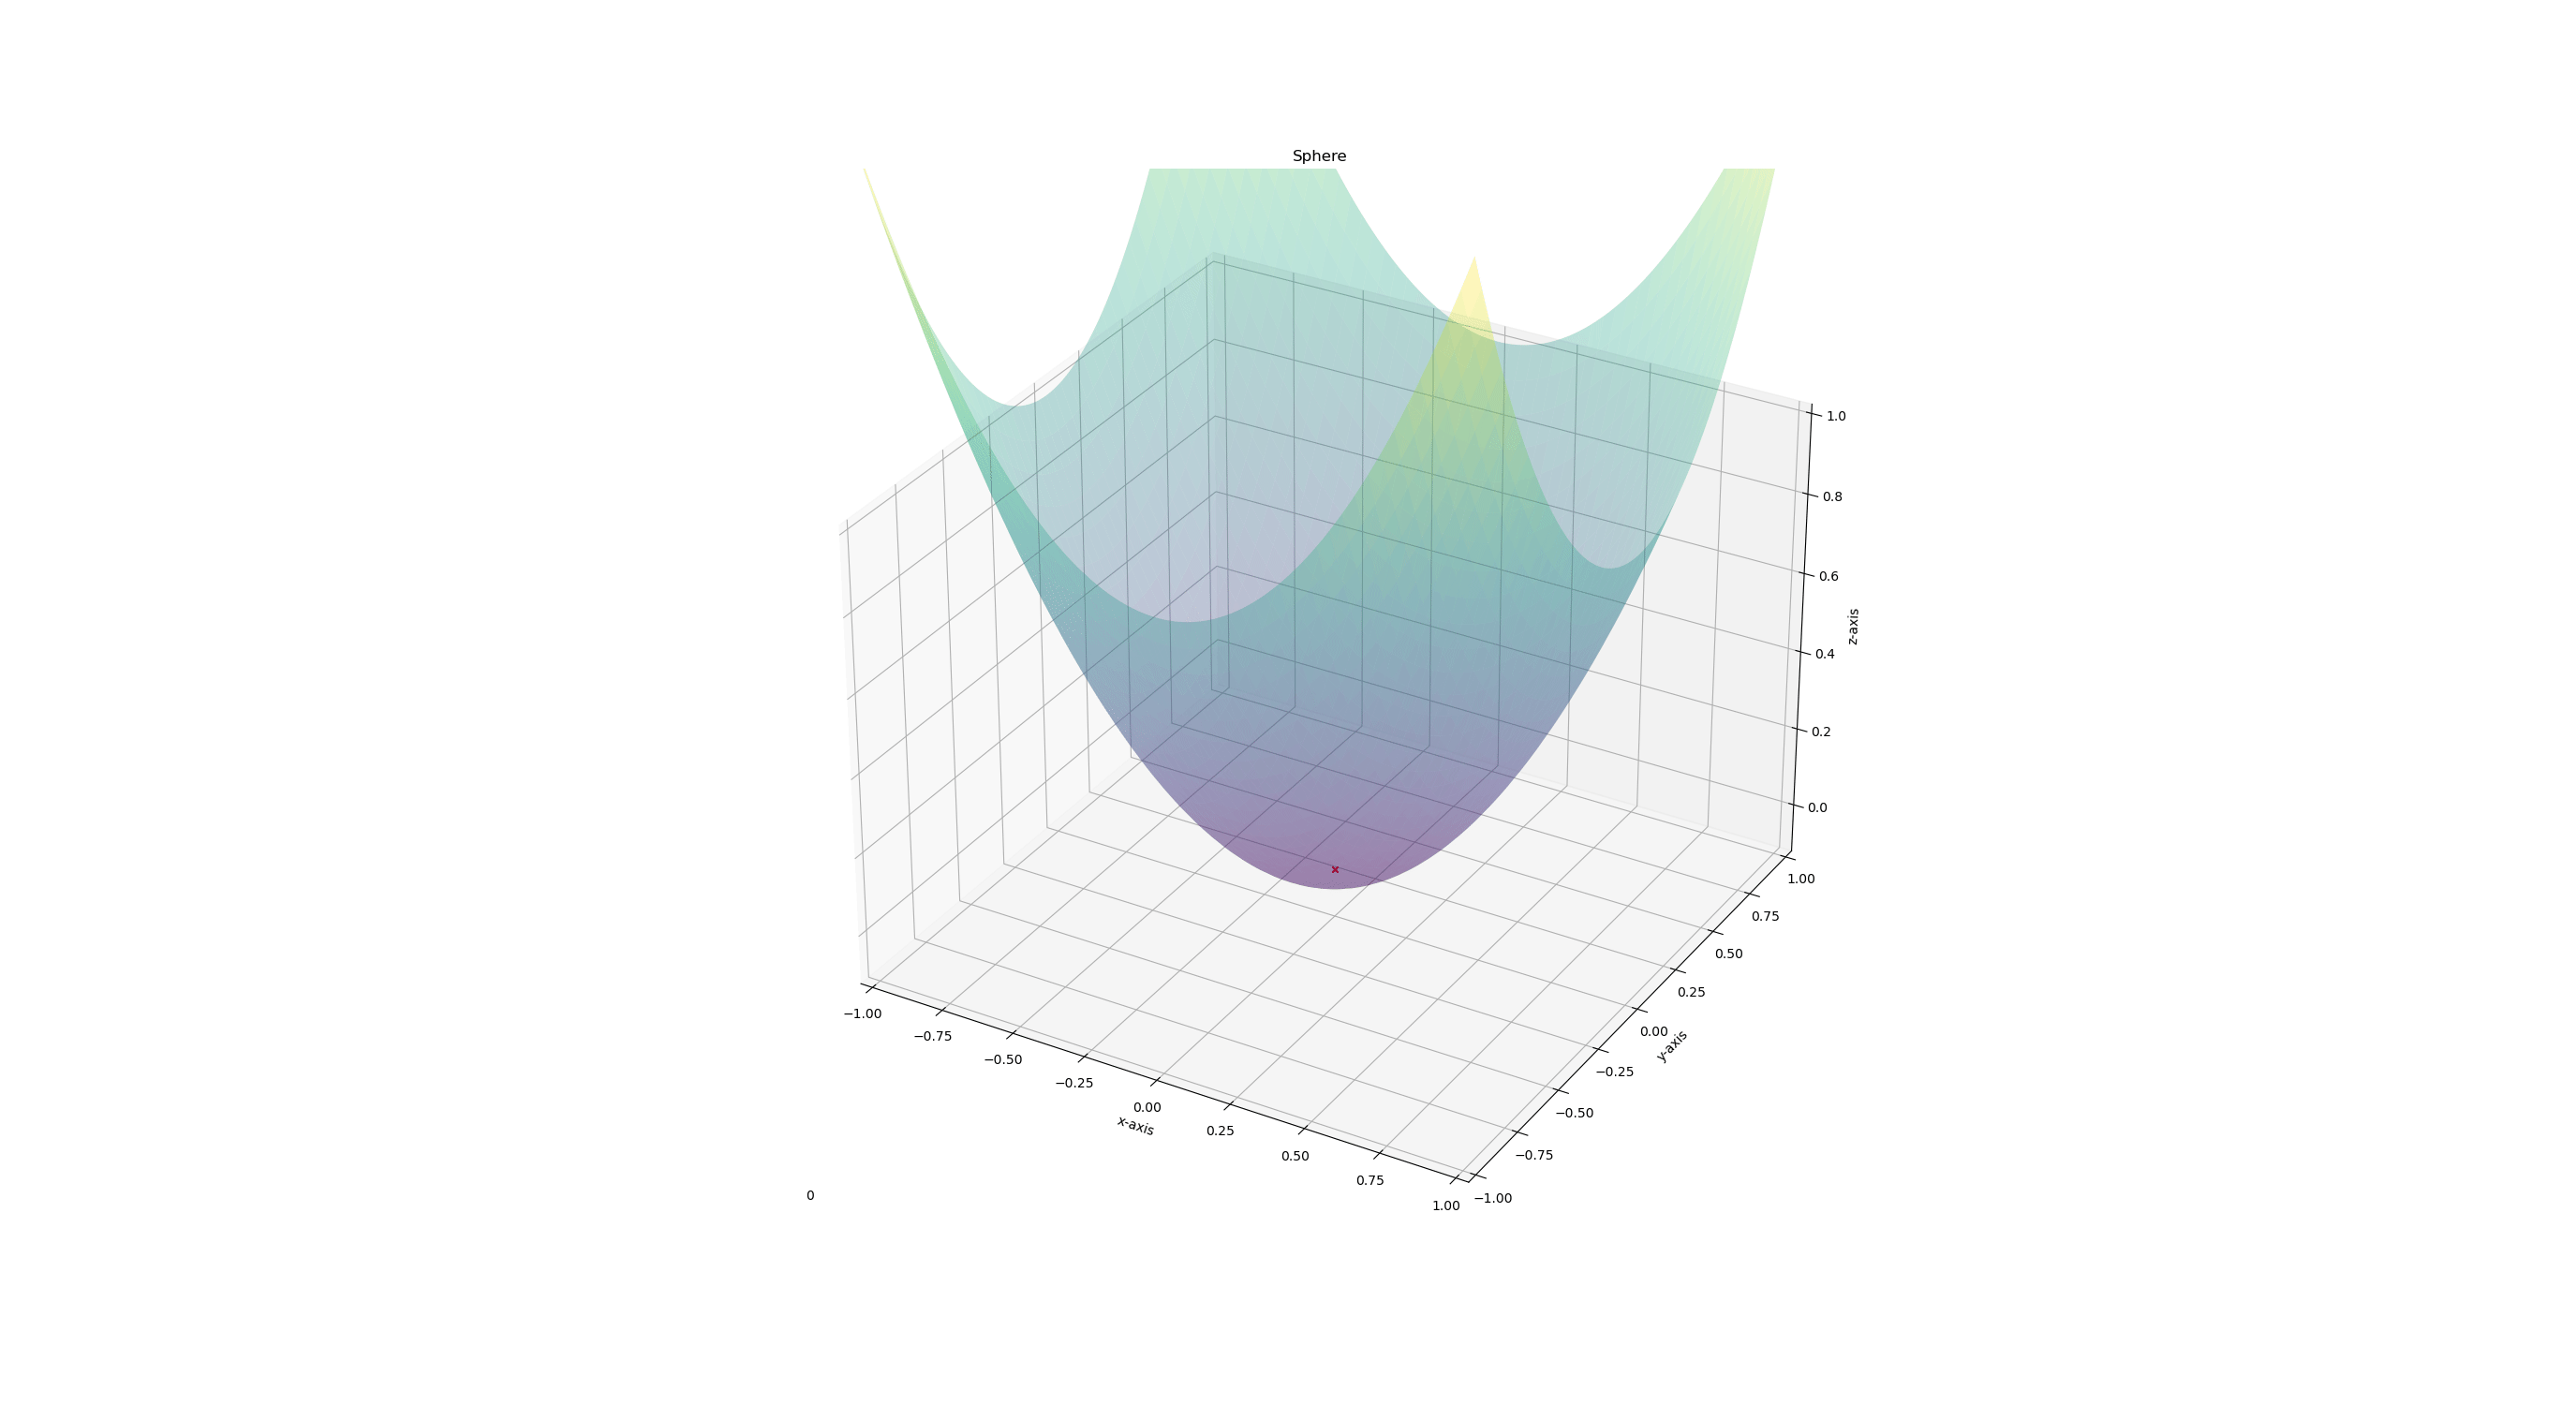

In [20]:
Image('sphere_Random_3d.gif')

In [21]:
%%capture
d.limits = [(-5,5), (-5,5), (-0.1, 100.0)]
for i, opt in opts.items():
    pos_history_3d = m.compute_history_3d(opts[i].record_value['X']) #preprocessing
    animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Sphere", mark=global_opt)
    animation3d.save('sphere_zoom_'+i+'_3d.gif', writer='ffmpeg', fps=15)

Styblinski-Tang's  objective function

    -5 to 5 with global minimum of -39.16599*n_dim at (-2.903534,...,-2.903534)'''
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[-100,250]`